## Lab 6 - Frequency

This lab must be done **individually**. The required packages have been imported for you below.

In [75]:
import string
import numpy as np
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt

Load text file. Data from Project Gutenberg (https://www.gutenberg.org/).

In [76]:
txt = open("ulysses.txt","r")

Remove punctuations in text.

In [77]:
remove = dict.fromkeys(map(ord, string.punctuation))

Collapse tokens to lower case.

In [78]:
txt = txt.read().translate(remove).lower()

Construct a dictionary where `key` = word, `value` = count (or frequency).

In [79]:
wordfreq = {}
for word in txt.split():
    if word not in wordfreq:
        wordfreq[word] = 1
    else:
        wordfreq[word] += 1

**Hint**: Print `wordfreq` to see what this dictionary contains.

To work with keys and values in dictionaries, you may refer to https://docs.python.org/2/tutorial/datastructures.html.
Alternatively, refer to the Python tutorial posted on course syllabus.

In this lab, you will reconstruct the classic work by Zipf (1949) on the properties of word frequency---read Zipf's chapter posted. Following these instructions and enjoy this final lab of the course!

In [80]:
# print(wordfreq)

### Task 1 [2 pts]

**Hint**: For how to `sort` and use `list` comprehension in Python, see the Python tutorial posted on course syllabus.

**Task 1a**: Construct an array of sorted word frequency of all words, and a separate array of word lengths.

In [81]:
# Note: this code chunk will produce the first 10 items of the desired arrays, so the output pdf would look nicer.

# convert dictionary into an array
wordfreq_array = [[key, value] for key, value in wordfreq.items()]

# create sorted words(mot frequent to leas frequent)
sorted_wordfreq = [[key, val] for key, val in sorted(wordfreq_array, key = lambda x: x[1], reverse = True)]
sorted_wordfreq_words = [key for key, val in sorted_wordfreq]
print("Array of sorted words: ", sorted_wordfreq_words[:10])

# create sorted word frequency of all words 
sorted_wordfreq_frequency = [val for key, val in sorted_wordfreq]
print("Array of sorted word frequency: ", sorted_wordfreq_frequency[:10])

# create sorted word lengths of all words
sorted_wordfreq_length = [len(word) for word, freq in sorted_wordfreq]
print("Array of sorted word lengths: ", sorted_wordfreq_length[:10])

Array of sorted words:  ['the', 'of', 'and', 'a', 'to', 'in', 'he', 'his', 'that', 'with']
Array of sorted word frequency:  [15010, 8250, 7216, 6512, 5031, 4974, 3998, 3327, 2586, 2557]
Array of sorted word lengths:  [3, 2, 3, 1, 2, 2, 2, 3, 4, 4]


**Task 1b**: Construct an array of ranks from on the sorted frequency array in **Task 1a** (using ordinal rank).

In [82]:
# Note: this code chunk will produce the first 10 items of the desired arrays, so the output pdf would look nicer.

rank_array = [i for i in range(1, len(sorted_wordfreq) + 1)]
print("Array of ranks from the sorted frequency array: ", rank_array[:10])

Array of ranks from the sorted frequency array:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


**Task 1c**: Print the most frequent 20 words and their frequencies. **[1pt]**

In [83]:
# we can directly printed from the sorted array (that was converted from dictionary)
print("The most frequent 20 words and their frequencies: ", sorted_wordfreq[:20])

print("-------------------------") # to make pdf output presentation nicer

# we can also print them separately
print("The most frequent 20 words: ", sorted_wordfreq_words[:20])
print(" ")
print("And their respected frequencies: ", sorted_wordfreq_frequency[:20])

The most frequent 20 words and their frequencies:  [['the', 15010], ['of', 8250], ['and', 7216], ['a', 6512], ['to', 5031], ['in', 4974], ['he', 3998], ['his', 3327], ['that', 2586], ['with', 2557], ['i', 2553], ['it', 2351], ['was', 2126], ['on', 2119], ['for', 1950], ['you', 1914], ['her', 1783], ['him', 1522], ['is', 1435], ['all', 1329]]
-------------------------
The most frequent 20 words:  ['the', 'of', 'and', 'a', 'to', 'in', 'he', 'his', 'that', 'with', 'i', 'it', 'was', 'on', 'for', 'you', 'her', 'him', 'is', 'all']
 
And their respected frequencies:  [15010, 8250, 7216, 6512, 5031, 4974, 3998, 3327, 2586, 2557, 2553, 2351, 2126, 2119, 1950, 1914, 1783, 1522, 1435, 1329]


### Task 2 [3 pts]

Produce a 2-by-2 set of subplots using `subplot`: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

**Task 2a**: Scatter plot word frequency (y-axis) against rank (x-axis). **[.5pt]**

**Task 2b**: Scatter plot $log(freq)$ against $log(rank)$. **[.5pt]**

**Task 2c**: Calculate and report the slope from **Task 2b** (via linear regression), i.e. slope of $log(freq)$ vs $log(rank)$. **[.5pt]**

**Task 2d**: Scatter plot frequency against word length. **[.5pt]**

**Task 2e**: Scatter plot $log(freq)$ against word length. **[.5pt]**

For a clearer presentation of the individual plots, please see Appendix

The slope of log(freq) v.s. log(rank):  -1.0332621845538876


Text(0, 0.5, 'log(freq)')

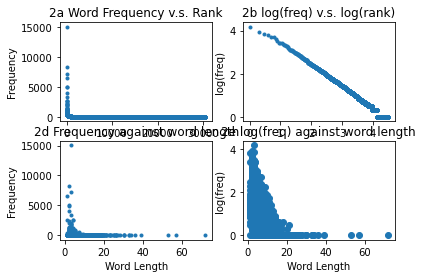

In [84]:
# Task 2a
plt.subplot(2,2,1)
plt.scatter(rank_array, sorted_wordfreq_frequency, marker = ".")
plt.title("2a Word Frequency v.s. Rank")
plt.xlabel("Rank")
plt.ylabel("Frequency")


# Task 2b
log_freq = np.log10(sorted_wordfreq_frequency)
log_rank = np.log10(rank_array)
plt.subplot(2,2,2)
plt.scatter(log_rank, log_freq, marker = ".")
plt.title("2b log(freq) v.s. log(rank)")
plt.xlabel("log(rank)")
plt.ylabel("log(freq)")


# Task 2c
[slope, y_int] = np.polyfit(log_rank, log_freq, 1)
print("The slope of log(freq) v.s. log(rank): ", slope)


# Task 2d
plt.subplot(2,2,3)
plt.scatter(sorted_wordfreq_length, sorted_wordfreq_frequency, marker = ".")
plt.title("2d Frequency against word length")
plt.xlabel("Word Length")
plt.ylabel("Frequency")


# Task 2e Scatter plot log(freq) against word length.
plt.subplot(2,2,4)
plt.scatter(sorted_wordfreq_length, log_freq)
plt.title("2e log(freq) against word length")
plt.xlabel("Word Length")
plt.ylabel("log(freq)")


### Task 3 [1 pt]

Calculate and report the Pearson correlation between $log(freq)$ and word length. **[.5pt]**

**Hint**: You may use `scipy.stats.pearsonr`; the first output is Pearson correlation.

In [85]:
outputs = pearsonr(log_freq, sorted_wordfreq_length)
p_correlation = outputs[0]
print("Pearson correlation between log(freq) and word length is: ", p_correlation)


Pearson correlation between log(freq) and word length is:  -0.311193889517738


Negative pearon correlation indicates a negative linear relationship: as the values in x axis increases, y decreases. In this case: as word length increases, log(frequency) decreases. 

### Task 4 [5 pts]

**Task 4a**: Calculate and report the expected word length of English words based on the given data. **[1pt]**

$E[len] = \sum^{i} len(i) * prob(i)$, where $prob(i)$ = normalized frequency of word $i$ (over all available words).

In [86]:
def expected_word_length(word_list, frequency_list):
    total_number_word = np.sum(frequency_list)
    x_p_x = [(len(word) * (freq/total_number_word)) for word, freq in zip(word_list, frequency_list)]
    expected_word_length_sum = np.sum(x_p_x)
    return expected_word_length_sum
data_expected_word_length = expected_word_length(sorted_wordfreq_words, sorted_wordfreq_frequency)
print("Expected Wrod Length Given Data: ", data_expected_word_length)

Expected Wrod Length Given Data:  4.48533473677924


**Task 4b**: Perform a shuffled (permutation) test with 1000 shuffled trials. **[1pt]**

In [92]:
number_of_trial = 1000

shuffled_trails_length = []

# randomized_word = np.copy(sorted_wordfreq_words)
randomized_frequency = np.copy(sorted_wordfreq_frequency)
shuffled_trails_frequency = []

for i in range(0, number_of_trial):
    # np.random.shuffle(randomized_word)
    np.random.shuffle(randomized_frequency)
    shuffled_trails_frequency.append(randomized_frequency)
    length = expected_word_length(sorted_wordfreq_words, randomized_frequency)
    shuffled_trails_length.append(length)

average_expected_word_length = np.mean(shuffled_trails_length)

print("The first 20 expected word length of the permutation trials are: ", shuffled_trails_length[:20])
print("The Average Expected word length from the permutation trials: ", average_expected_word_length)

The first 20 expected word length of the permutation trials are:  [7.3934948789154635, 7.284634506852996, 7.551878975185882, 7.722670130490609, 7.588861267879006, 7.330649616291917, 7.662262235360865, 7.703376481829855, 7.550949565528979, 7.66005628713906, 7.67305309206008, 7.268479948639852, 7.638407387500373, 7.637888560422826, 7.596214428618353, 7.289169578070411, 7.374246021081549, 7.291420317119055, 7.306671593657619, 7.778199558063843]
The Average Expected word length from the permutation trials:  7.471328641494221


**Task 4c**: Based on the shuffled trials, histogram the expected word lengths from the shuffled data. **[.5pt]**

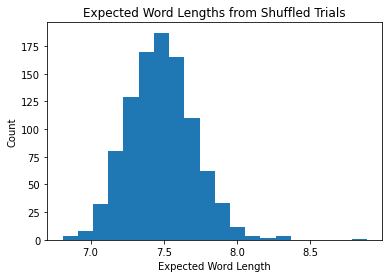

In [88]:
plt.hist(shuffled_trails_length, bins = 20)
plt.title("Expected Word Lengths from Shuffled Trials")
plt.xlabel("Expected Word Length")
plt.ylabel("Count")
plt.show()

**Task 4d**: Calculate and report the _p-value_ from the shuffled test. 

The null hypothesis is that the expected word length is no different from the expected length from shuffled data. 
Based on the _p-value_ you have obtained, conclude whether the null should be rejected $(p<0.05)$. **[.5pt]**

In [93]:
num_item_smaller_than_dob = np.array(np.where(shuffled_trails_length <= data_expected_word_length)).size
p_value = num_item_smaller_than_dob / number_of_trial


print("p-value: ", p_value)

p-value:  0.0


Since p value is smaller than 0.05, we reject the null hypothesis. We can say that there is a difference from the expcted lenth from shuffled data. 

### Task 5

Propose an alternative way of mapping words to frequencies and show that it produces a lower expected length than the empirical value you calculated, justify your proposal, and print the top 20 most frequent words under this proposal. **[3pts]**

By mapping the highest frequency with the shortest words will produces the lowest expected word length. If we analyze the formula: $E[len] = \sum^{i} len(i) * prob(i)$, we can see that $prob(i)$ will be larger if the frequency is high. In other words, the short lengths will be weighted more by the high frequency. 

In [94]:
word_list = np.copy(sorted_wordfreq_words)
freq_list = np.copy(sorted_wordfreq_frequency)

word_list_sort = sorted(word_list, key = lambda x: len(x)) # short length to long length
freq_list_sort = sorted(freq_list, key = lambda x: x, reverse = True) # high frequency to low

expected_word_length = expected_word_length(word_list_sort, freq_list_sort)
print("The expected word length after alternative mappping: ", expected_word_length)


The expected word length after alternative mappping:  2.8965705156917196


Export and submit a **fully executable** Python Jupyter Notebook and a PDF copy of your notebook showing all results. 

### Appendix 

Individual plots from Task 2

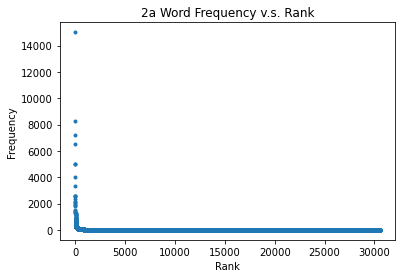

In [95]:
# Task 2a
plt.scatter(rank_array, sorted_wordfreq_frequency, marker = ".")
plt.title("2a Word Frequency v.s. Rank")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.show()

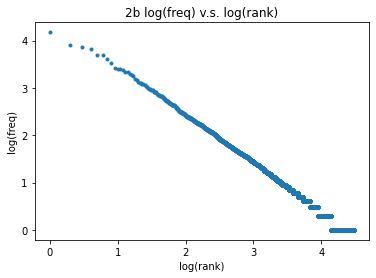

In [96]:
# Task 2b
log_freq = np.log10(sorted_wordfreq_frequency)
log_rank = np.log10(rank_array)

plt.scatter(log_rank, log_freq, marker = ".")
plt.title("2b log(freq) v.s. log(rank)")
plt.xlabel("log(rank)")
plt.ylabel("log(freq)")
plt.show()


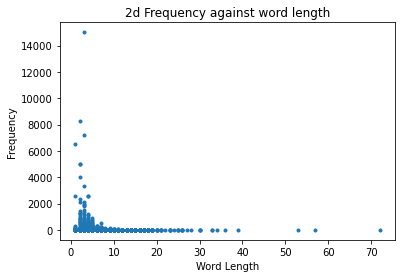

In [97]:
# Task 2d

plt.scatter(sorted_wordfreq_length, sorted_wordfreq_frequency, marker = ".")
plt.title("2d Frequency against word length")
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.show()

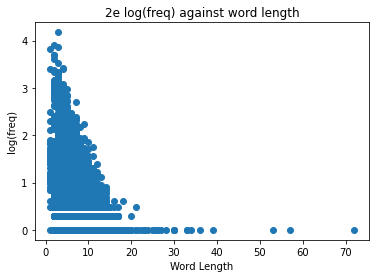

In [98]:

# Task 2e Scatter plot log(freq) against word length.

plt.scatter(sorted_wordfreq_length, log_freq)
plt.title("2e log(freq) against word length")
plt.xlabel("Word Length")
plt.ylabel("log(freq)")
plt.show()